Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 128 x 128.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,0.2,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
5 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.125, 0.0, 0.0>
  Vector3<0.25, 0.0, 0.0>
  Vector3<0.375, 0.0, 0.0>
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.05327486991882324
solve_kpoint (0,0,0):
freqs:, k index, k1, k2, k3, kmag/2pi, band 1, band 2, band 3, band 4
Solving for bands 3 to 4.

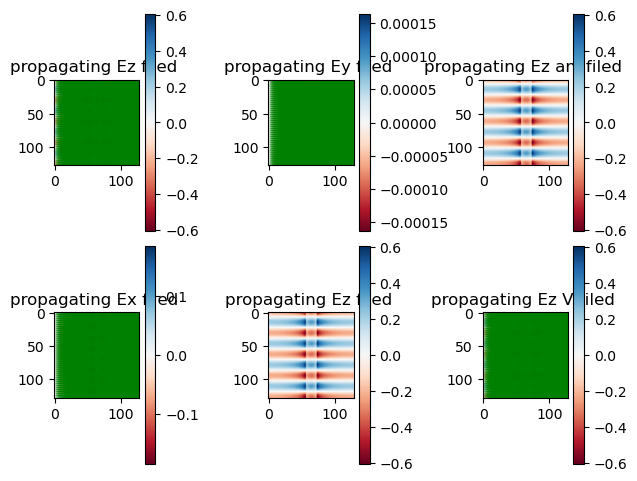

In [1]:
import meep as mp
from meep import mpb 
import matplotlib.pyplot as plt
import numpy as np

num_bands = 4
resolution = 32
n_lo =1.99

geometry_lattice = mp.Lattice(size=mp.Vector3(0,4,4),
                              basis1=mp.Vector3(1, 0))  # 1d cell

k_points = [mp.Vector3(kx) for kx in np.linspace(0, 0.5, 5)]
default_material = mp.Medium(index=1)
geometry =[ mp.Block(
    size=mp.Vector3(mp.inf, 0.2,0.5),
    center=mp.Vector3(),
    material=mp.Medium(index=n_lo),
)]

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    num_bands=num_bands,
    resolution=resolution,
    default_material= default_material
)

ms.run()

t_frqs = ms.all_freqs
gaps = ms.gap_list
ms.compute_zparities()
ms.compute_yparities()

mpb.output_efield(ms,1)
import h5py
with h5py.File('Rectprop-e.k05.b01.h5', 'r') as file:
    data0 = file['x.i'][:]
    data1 = file['x.r'][:]
    data2 = file['y.i'][:]
    data3 = file['y.r'][:]
    data4 = file['z.i'][:]
    data5 = file['z.r'][:]
Ex_i = data0[:128]
Ex_r = data1[:128]
Ey_i = data2[:128]
Ey_r = data3[:128]
Ez_i = data4[:128]
Ez_r = data5[:128]

Ex = Ex_r + 1j*Ex_i
Ey = Ey_r + 1j*Ey_i
Ez = Ez_r + 1j*Ez_i

a = 1 # period constant
K_0 = 0.5*(2*np.pi)/a #k_0 is the proapagation contstat in x direction
Ez_list = []
Ey_list = []
Ex_list =[]
period_inx = 4*2*a
resl_inx = 2*64
period_intime = 2*np.pi*a
resl_intime =10
t_values = np.linspace(0, 2*period_intime, resl_intime)
x_values = np.linspace(0, period_inx*1, resl_inx)

#time Evolution
# for x in x_values:
#     for t in t_values:
#         Ez_list.append(Ez[64,:]*(np.exp(1j*K_0*x)*np.exp(1j*t)))
#         Ey_list.append(Ey[64,:]*(np.exp(1j*K_0*x)*np.exp(1j*t)))
#         Ex_list.append(Ex[64,:]*(np.exp(1j*K_0*x)*np.exp(1j*t)))
# Ez_list = np.array(Ez_list)
# Ey_list = np.array(Ey_list)
# Ex_list = np.array(Ex_list)

# Iz_list = np.abs(Ez_list)**2
# Iy_list = np.abs(Ey_list)**2
# Ix_list = np.abs(Ex_list)**2
# I_tot_list = Iz_list + Iy_list +Ix_list
# X, Y = np.meshgrid(128*np.linspace(0,1, 128), 640*np.linspace(0,1,640))
# fig, ax  = plt.subplots()
# Ezplt = ax.imshow(np.real(Ez_list), cmap= 'RdBu', aspect='equal')
# ax.quiver(X,Y, np.real(Ex_list), color = 'green', scale = 10)
# ax.set_title('propagating Ez filed ')
# plt.colorbar(Ezplt, ax = ax)
# # from matplotlib.animation import FuncAnimation
# # def update(frame):
# #     Ezplt.set_data(np.real(Ez_list[frame:]))
# #     return[Ezplt]
# # anim = FuncAnimation(fig, update, frames=(len(t_values)))
# plt.show()






# longitudanal
for x in x_values:
    Ez_list.append(Ez[64,:]*(np.exp(1j*K_0*x)))
    Ey_list.append(Ey[64,:]*(np.exp(1j*K_0*x)))
    Ex_list.append(Ex[64,:]*(np.exp(1j*K_0*x)))
Ez_list = np.array(Ez_list)
Ey_list = np.array(Ey_list)
Ex_list = np.array(Ex_list)

Iz_list = np.abs(Ez_list)**2
Iy_list = np.abs(Ey_list)**2
Ix_list = np.abs(Ex_list)**2
I_tot_list = Iz_list + Iy_list +Ix_list
X, Y = np.meshgrid(resl_inx*np.linspace(0,1,resl_inx), 
                   resl_inx*np.linspace(0,1, resl_inx))
fig, ax  = plt.subplots(2,3)
Ezplt_v = ax[0,0].imshow(np.real(Ez_list), cmap= 'RdBu', aspect='equal')
ax[0,0].quiver(X, np.real(Ez_list), color = 'green', scale = 5)
ax[0,0].set_title('propagating Ez filed ')
plt.colorbar(Ezplt_v, ax = ax[0,0])

Eyplt = ax[0,1].imshow(np.real(Ey_list), cmap= 'RdBu', aspect='equal')
ax[0,1].quiver(X, np.real(Ey_list), color = 'green', scale = 15)
ax[0,1].set_title('propagating Ey filed ')
plt.colorbar(Eyplt, ax = ax[0,1])

Explt = ax[1,0].imshow(np.real(Ex_list), cmap= 'RdBu', aspect='equal')
ax[1,0].quiver(X, np.real(Ex_list), color = 'green', scale = 15)
ax[1,0].set_title('propagating Ex filed ')
plt.colorbar(Explt, ax = ax[1,0])

Ezplt = ax[1,1].imshow(np.real(Ez_list), cmap= 'RdBu', aspect='equal')
ax[1,1].set_title('propagating Ez filed ')
plt.colorbar(Ezplt, ax = ax[1,1])

Ezplt_ani = ax[0,2].imshow(np.real(Ez_list), cmap= 'RdBu', aspect='equal')
ax[0,2].set_title('propagating Ez ani filed ')
plt.colorbar(Ezplt_ani, ax = ax[0,2])

Ezplt_aniV = ax[1,2].imshow(np.real(Ez_list), cmap= 'RdBu', aspect='equal')
ax[1,2].quiver(X, np.real(Ez_list), color ='green', scale = 10)
ax[1,2].set_title('propagating Ez V filed ')
plt.colorbar(Ezplt_aniV, ax = ax[1,2])

from matplotlib.animation import FuncAnimation
def update(frame):
    Ezplt_ani.set_data(np.real(Ez_list[:frame]))
    Ezplt_aniV.set_data(np.real(Ez_list[:frame]))
    return[Ezplt_ani], [Ezplt_aniV]
anim = FuncAnimation(fig, update, frames=(len(t_values)))

plt.tight_layout()
plt.show()

In [2]:
print(type(Ez_list))
print(Ez_list.shape)

<class 'numpy.ndarray'>
(128, 128)


In [7]:
print(x_values.shape)
print(Ez_list[64,:])
print(Ez_list[64,:].shape)

(128,)
[-0.21330448-0.07641467j -0.21330477-0.07641494j -0.21345678-0.0764689j
 -0.21360908-0.07652428j -0.21391455-0.07663257j -0.21421994-0.07674345j
 -0.21468103-0.07690681j -0.21514168-0.07707399j -0.2157617 -0.07729362j
 -0.21638099-0.0775183j  -0.2171645 -0.07779581j -0.21794706-0.07807968j
 -0.21890005-0.07841721j -0.21985195-0.07876245j -0.220982  -0.07916268j
 -0.22211094-0.07957208j -0.22342747-0.08003837j -0.22474307-0.08051541j
 -0.22625772-0.08105189j -0.22777186-0.08160085j -0.22949889-0.0822126j
 -0.23122618-0.08283876j -0.23318308-0.08353199j -0.23514151-0.08424185j
 -0.23734976-0.0850242j  -0.2395615 -0.08582576j -0.24204767-0.08670669j
 -0.24454023-0.08760987j -0.24733735-0.08860113j -0.25014516-0.08961836j
 -0.25329482-0.09073476j -0.25646146-0.09188175j -0.2600167 -0.09314217j
 -0.26359818-0.09443911j -0.26762782-0.09586806j -0.27169749-0.09734139j
 -0.27629273-0.09897137j -0.2809489 -0.10065651j -0.28623374-0.10253172j
 -0.2916119 -0.10447745j -0.29776026-0.1066599

In [55]:
Ez_list11=[]
print(len(x_values))
for x in x_values:
    Ez_list11.append(Ez[64,:]*(np.exp(1j*K_0*x)))
    
Ez_list11 = np.array(Ez_list11)
print(Ez_list11)
print(Ez_list11.shape)

128
[[-0.21980987-0.05496932j -0.21981019-0.05496955j -0.21996678-0.05500824j
  ... -0.22012403-0.0550474j  -0.21996663-0.05500884j
  -0.21981026-0.05496926j]
 [-0.2047124 -0.09711249j -0.20471267-0.09711278j -0.20485861-0.0971815j
  ... -0.20500508-0.09725082j -0.20485834-0.09718206j
  -0.2047128 -0.0971125j ]
 [-0.18162399-0.13546487j -0.18162419-0.13546521j -0.18175377-0.13556128j
  ... -0.18188376-0.13565804j -0.1817534 -0.13556178j
  -0.18162437-0.13546497j]
 ...
 [-0.22400954+0.0340254j  -0.22400993+0.0340253j  -0.22416934+0.03404998j
  ... -0.22432953+0.03407446j -0.22416943+0.03404937j
  -0.22400988+0.0340256j ]
 [-0.22632705-0.01068042j -0.22632741-0.01068059j -0.22648855-0.01068773j
  ... -0.22665043-0.01069521j -0.22648852-0.01068835j
  -0.22632742-0.01068028j]
 [-0.21980987-0.05496932j -0.21981019-0.05496955j -0.21996678-0.05500824j
  ... -0.22012403-0.0550474j  -0.21996663-0.05500884j
  -0.21981026-0.05496926j]]
(128, 128)


(128, 128)
<class 'numpy.ndarray'>
(128,)
[-0.21980987 -0.21981019 -0.21996678 -0.22012381 -0.22043848 -0.22075333
 -0.2212283  -0.22170321 -0.22234189 -0.22298035 -0.22378745 -0.22459422
 -0.22557589 -0.22655724 -0.2277213  -0.22888516 -0.23024132 -0.23159761
 -0.23315784 -0.23471881 -0.23649782 -0.23827852 -0.24029432 -0.2423133
 -0.24458804 -0.24686815 -0.24942917 -0.25199877 -0.25488013 -0.2577747
 -0.26101923 -0.26428369 -0.26794605 -0.27163813 -0.27578922 -0.27998453
 -0.28471831 -0.28951818 -0.29496241 -0.30050648 -0.30684037 -0.31332774
 -0.32081225 -0.32853861 -0.33757138 -0.34699773 -0.35821852 -0.37010578
 -0.38461145 -0.40029532 -0.42009764 -0.4420305  -0.47097247 -0.50326555
 -0.54779598 -0.58883445 -0.42229086 -0.21114665 -0.2467617  -0.2748757
 -0.29608052 -0.31193792 -0.32261798 -0.32908344 -0.33103938 -0.32908369
 -0.32261748 -0.31193853 -0.29607945 -0.27487736 -0.24675886 -0.21115243
 -0.42227794 -0.58886452 -0.54777879 -0.50328021 -0.47095989 -0.4420414
 -0.42008771 

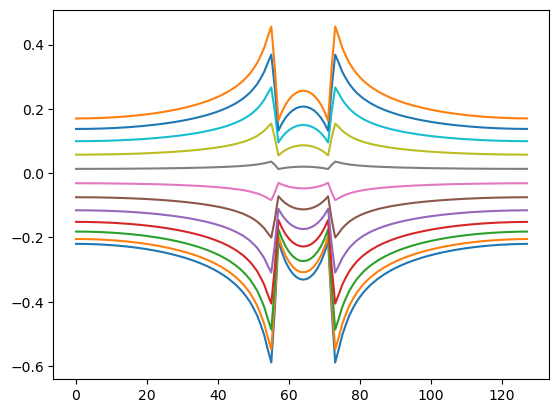

In [51]:
print(Ez_list11.shape)
print(type(Ez_list11))
# Ez_list11_r = np.reshape(Ez_list11,(128,1))
# print(Ez_list11_r.shape)
for i in range(12):
    print(Ez_list11[i].shape)
    print(np.real(Ez_list11[i]))
    plt.plot(np.real(Ez_list11[i]))
    Ez_list11_r = np.reshape(Ez_list11[i],(-1,1))
    # plt.imshow(np.real(Ez_list11_r), aspect='equal')